In [ ]:
%matplotlib inline
import pandas as pd
pd.options.display.max_columns = 100
from matplotlib import pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
import numpy as np
pd.options.display.max_rows = 100

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

def status(feature):
    print ('Processing',feature,': ok')
    
def get_combined_data():

    targets = train.mvar46
    train.drop('mvar46', 1, inplace=True)
    
    combined = train.append(test)
    combined.reset_index(inplace=True)
    combined.drop('index', inplace=True, axis=1)
    
    return combined
combined = get_combined_data()
combined.drop(['cm_key','mvar1','mvar3','mvar5','mvar6','mvar9','mvar13','mvar16','mvar17','mvar18','mvar19','mvar20','mvar21','mvar22','mvar23','mvar24','mvar25','mvar26','mvar27','mvar28','mvar29','mvar30','mvar31','mvar32','mvar33','mvar34','mvar35','mvar36','mvar37','mvar38','mvar39'], 1, inplace=True)

def process_mvar12():
    
    global combined    
    # dummy encoding 
    mvar12_dummies = pd.get_dummies(combined['mvar12'],prefix='mvar12')
    combined = pd.concat([combined,mvar12_dummies],axis=1)
    combined.drop('mvar12',axis=1,inplace=True)
    
    status('mvar12')
    
process_mvar12()

C:\Users\Febin Subair\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (1,16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
def process_mvar2():
    
    global combined    
    # dummy encoding 
    mvar2_dummies = pd.get_dummies(combined['mvar2'],prefix='mvar2')
    combined = pd.concat([combined,mvar2_dummies],axis=1)
    combined.drop('mvar2',axis=1,inplace=True)
    
    status('mvar2')
process_mvar2()

Processing mvar2 : ok


In [3]:
def process_mvar13():
    
    global combined    
    # dummy encoding 
    mvar13_dummies = pd.get_dummies(combined['mvar13'],prefix='mvar13')
    combined = pd.concat([combined,mvar13_dummies],axis=1)
    combined.drop('mvar13',axis=1,inplace=True)
    
    status('mvar13')
process_mvar13()

Processing mvar13 : ok


In [4]:
def process_mvar14():
    
    global combined    
    # dummy encoding 
    mvar14_dummies = pd.get_dummies(combined['mvar14'],prefix='mvar14')
    combined = pd.concat([combined,mvar14_dummies],axis=1)
    combined.drop('mvar14',axis=1,inplace=True)
    
    status('mvar14')
process_mvar14()

Processing mvar14 : ok


In [5]:
def process_mvar4():
    
    global combined    
    # dummy encoding 
    mvar4_dummies = pd.get_dummies(combined['mvar4'],prefix='mvar4')
    combined = pd.concat([combined,mvar4_dummies],axis=1)
    combined.drop('mvar4',axis=1,inplace=True)
    
    status('mvar4')
process_mvar4()

Processing mvar4 : ok


In [6]:
def process_mvar40():
    
    global combined    
    # dummy encoding 
    mvar40_dummies = pd.get_dummies(combined['mvar40'],prefix='mvar40')
    combined = pd.concat([combined,mvar40_dummies],axis=1)
    combined.drop('mvar40',axis=1,inplace=True)
    
    status('mvar40')
process_mvar40()

Processing mvar40 : ok


/home/febincp2012/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/febincp2012/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


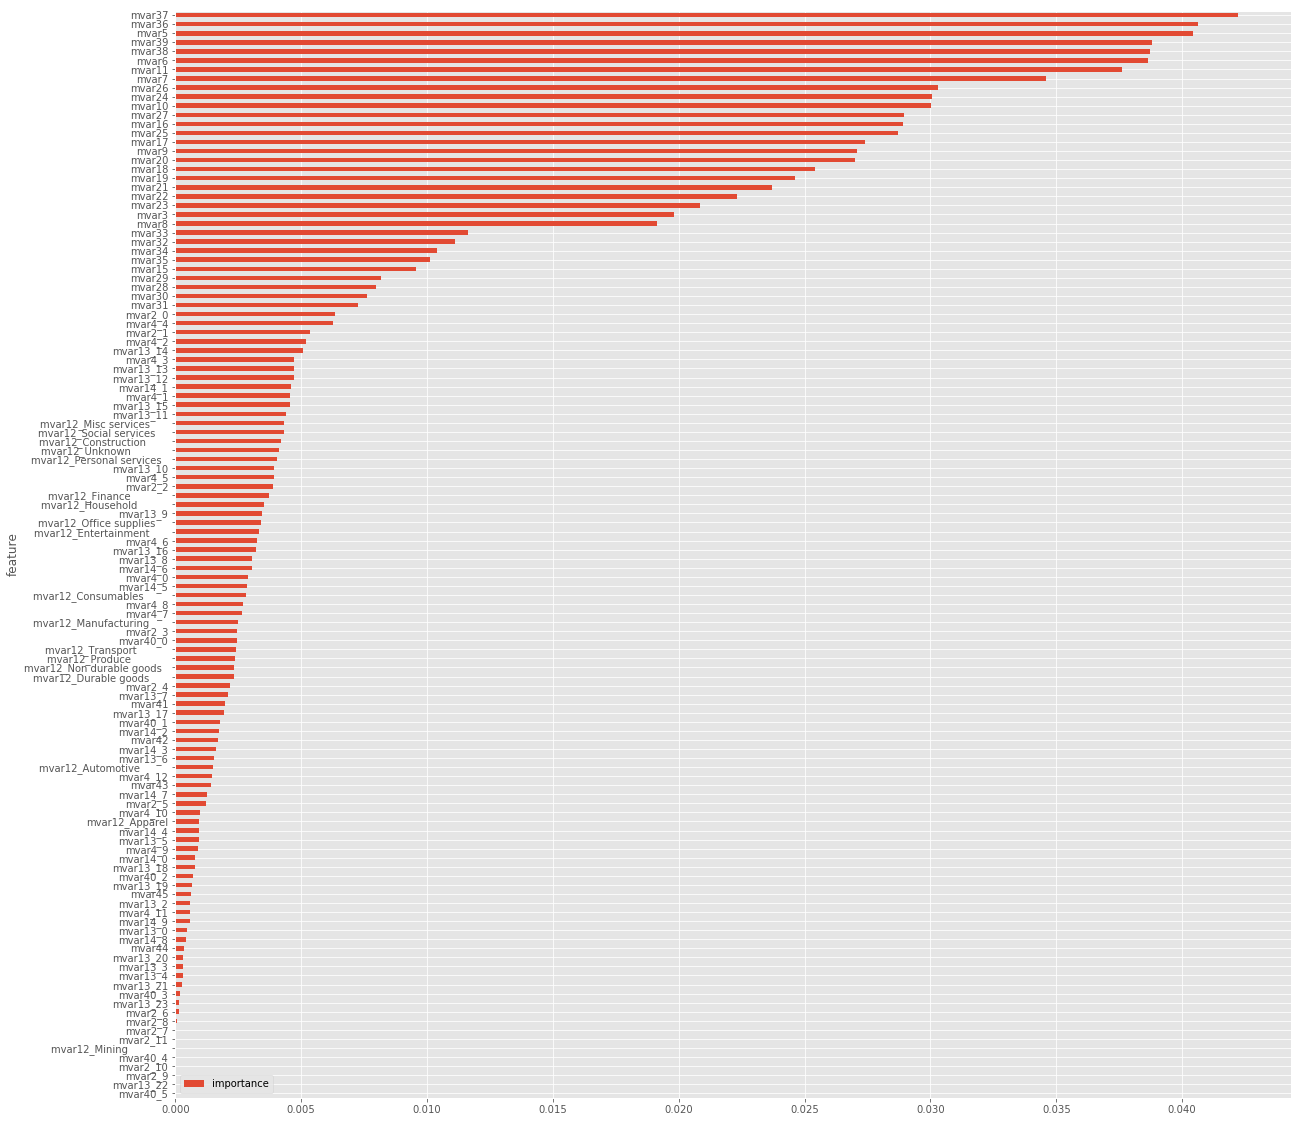

In [7]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.cross_validation import StratifiedKFold
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier
from sklearn.cross_validation import cross_val_score

def compute_score(clf, X, y, scoring='accuracy'):
    xval = cross_val_score(clf, X, y, cv = 5, scoring=scoring)
    return np.mean(xval)

def recover_train_test_target():
    global combined
    
    train0 = pd.read_csv('train.csv')
    
    targets = train0.mvar50
    train = combined.head(40000)
    test = combined.iloc[40000:]
    
    return train, test, targets

train, test, targets = recover_train_test_target()

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
clf = RandomForestClassifier(n_estimators=50, max_features='sqrt')
clf = clf.fit(train, targets)
features = pd.DataFrame()
features['feature'] = train.columns
features['importance'] = clf.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)
features.plot(kind='barh', figsize=(20, 20))

In [8]:
model = SelectFromModel(clf, prefit=True)
train_reduced = model.transform(train)
train_reduced.shape

(40000, 29)

In [9]:
test_reduced = model.transform(test)
test_reduced.shape

(10000, 29)

In [10]:
run_gs = False

if run_gs:
    parameter_grid = {
                 'max_depth' : [4, 6, 8],
                 'n_estimators': [50, 10],
                 'max_features': ['sqrt', 'auto', 'log2'],
                 'min_samples_split': [1, 3, 10],
                 'min_samples_leaf': [1, 3, 10],
                 'bootstrap': [True, False],
                 }
    forest = RandomForestClassifier()
    cross_validation = StratifiedKFold(targets, n_folds=5)

    grid_search = GridSearchCV(forest,
                               scoring='accuracy',
                               param_grid=parameter_grid,
                               cv=cross_validation)

    grid_search.fit(train, targets)
    model = grid_search
    parameters = grid_search.best_params_

    print('Best score: {}'.format(grid_search.best_score_))
    print('Best parameters: {}'.format(grid_search.best_params_))
else: 
    parameters = {'bootstrap': False, 'min_samples_leaf': 3, 'n_estimators': 50, 
                  'min_samples_split': 10, 'max_features': 'sqrt', 'max_depth': 6}
    
    model = RandomForestClassifier(**parameters)
    model.fit(train, targets)

In [11]:
compute_score(model, train, targets, scoring='accuracy')

0.93365000271054688

In [12]:
output = model.predict(test).astype(int)
df_output = pd.read_csv('test2.csv')
aux = pd.read_csv('test.csv')
df_output['cm_key'] = aux['cm_key']
df_output['mvar50'] = output
df_output[['cm_key','mvar50']].to_csv('credit-card.csv',index=False)